0.8571428571428571


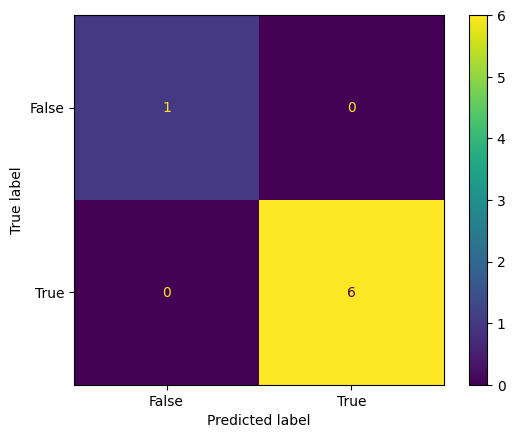

|--- jml_phsl <= -0.29
|   |--- jml_phsl <= -0.98
|   |   |--- class: 0
|   |--- jml_phsl >  -0.98
|   |   |--- class: 1
|--- jml_phsl >  -0.29
|   |--- jml_art <= 0.77
|   |   |--- status_tmpt <= -0.18
|   |   |   |--- class: 0
|   |   |--- status_tmpt >  -0.18
|   |   |   |--- jml_art <= -0.43
|   |   |   |   |--- class: 0
|   |   |   |--- jml_art >  -0.43
|   |   |   |   |--- class: 1
|   |--- jml_art >  0.77
|   |   |--- class: 1



In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Load data
data_train = pd.read_csv('data_train.csv')
data_test = pd.read_csv('data_test.csv')

# Preprocess data
X_train_awal = data_train.drop('hasil', axis=1)
X_train = np.array(X_train_awal.values)
y_train_awal = data_train['hasil']
y_train = np.array(y_train_awal.values)

X_test_awal = data_test.drop('hasil', axis=1)
X_test = pd.DataFrame(X_test_awal.values)
y_test_awal = data_test['hasil']
y_test = pd.DataFrame(y_test_awal.values)

# Train model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions
X_test_prediction = clf.predict(X_test)
X_test_predictionl = clf.predict(X_train)

# Evaluate model
X_test_awal['label_asli'] = y_test_awal
X_test_awal['label_pred'] = X_test_prediction
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print(test_data_accuracy)

# Confussion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_test_awal)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=[False, True])
cm_display.plot()
plt.show()

# Decision Tree Text Representation
from sklearn import tree
text_representation = tree.export_text(clf, feature_names=["jenis_pkj", "jml_phsl", "jml_art", "pengeluaran", "status_tmpt"])
print(text_representation)

# Decision Tree Graph
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=["jenis_pkj", "jml_phsl", "jml_art", "pengeluaran", "status_tmpt"],
                                class_names=['0', '1'], filled=True, max_depth=3)

graph = graphviz.Source(dot_data, format="png")